# HEALTHCARE DATA ANALYSIS




# PROBLEM STATEMENT 

# Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [31]:
df = pd.read_csv(r"C:\Users\admin\Downloads\healthcare_dataset.csv\healthcare_dataset.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [ ]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [29]:
df.drop(['Name','Room Number'],axis=1,inplace=True)
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


In [15]:
grouped_df = df.groupby('Medical Condition').size().reset_index(name='Number of Patients')

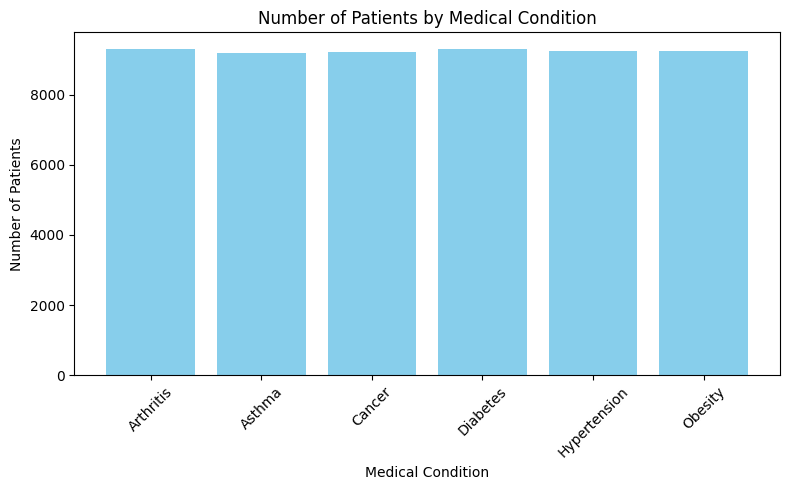

In [16]:
plt.figure(figsize=(8, 5))
plt.bar(grouped_df['Medical Condition'], grouped_df['Number of Patients'], color='skyblue')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.title('Number of Patients by Medical Condition')
plt.xticks(rotation=45)  # Rotate the x labels if needed
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

In [17]:
bins = [0, 18, 35, 55, float('inf')]
labels = ['0-18', '18-35', '35-55', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [18]:
grouped_df = df.groupby(['Medical Condition', 'Age Group'],observed=False).size().reset_index(name='Number of Patients')
grouped_df

,Medical Condition,Age Group,Number of Patients
0,Arthritis,0-18,21
1,Arthritis,18-35,2269
2,Arthritis,35-55,2789
3,Arthritis,55+,4229
4,Asthma,0-18,20
5,Asthma,18-35,2277
6,Asthma,35-55,2714
7,Asthma,55+,4174
8,Cancer,0-18,21
9,Cancer,18-35,2273


In [19]:
most_common = grouped_df.loc[grouped_df.groupby('Age Group', observed=False)['Number of Patients'].idxmax()]
most_common 

,Medical Condition,Age Group,Number of Patients
20,Obesity,0-18,27
21,Obesity,18-35,2288
2,Arthritis,35-55,2789
15,Diabetes,55+,4280


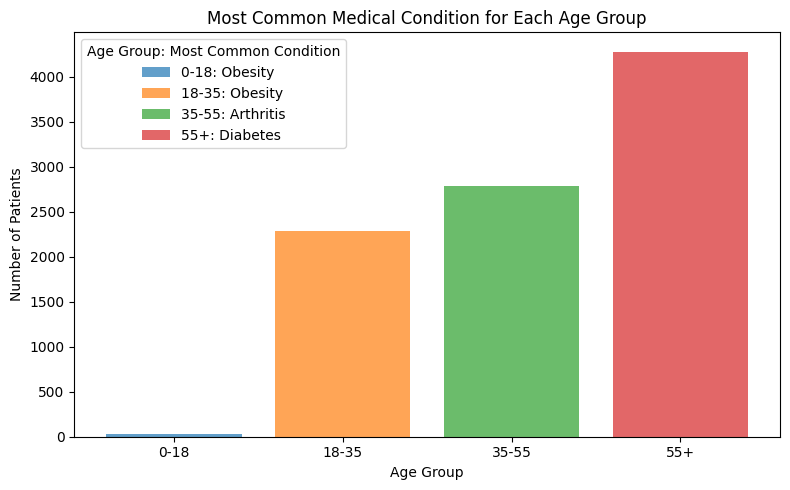

In [20]:
plt.figure(figsize=(8, 5))
for age_group, data in most_common.groupby('Age Group', observed=False):
    plt.bar(data['Age Group'], data['Number of Patients'], label=f'{age_group}: {data["Medical Condition"].values[0]}', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Most Common Medical Condition for Different Age Group')
plt.legend(title='Age Group: Most Common Condition')
plt.tight_layout()
plt.show()

In [33]:
grouped_df1 = df.groupby('Test Results').size().reset_index(name='Number of Patients')

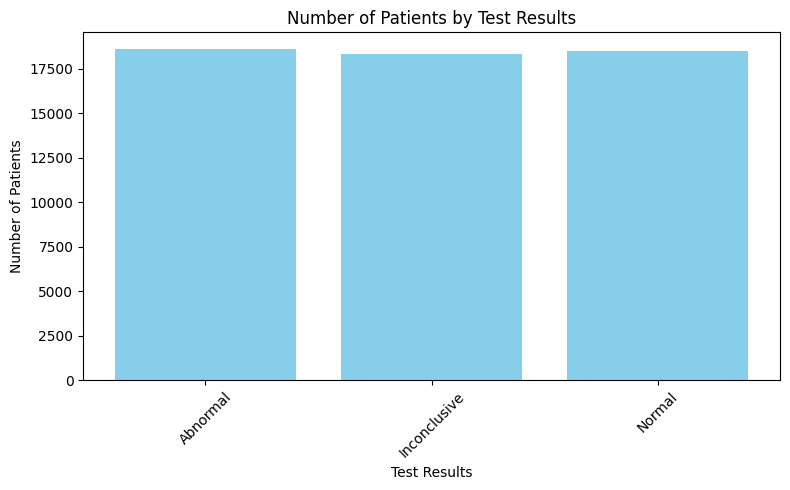

In [35]:
plt.figure(figsize=(8, 5))
plt.bar(grouped_df1['Test Results'], grouped_df1['Number of Patients'], color='skyblue')
plt.xlabel('Test Results')
plt.ylabel('Number of Patients')
plt.title('Number of Patients by Test Results')
plt.xticks(rotation=45)  # Rotate the x labels if needed
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

In [36]:
bins = [0, 18, 35, 55, float('inf')]
labels = ['0-18', '18-35', '35-55', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [37]:
grouped_df1 = df.groupby(['Test Results', 'Age Group'],observed=False).size().reset_index(name='Number of Patients')
grouped_df1

,Test Results,Age Group,Number of Patients
0,Abnormal,0-18,47
1,Abnormal,18-35,4483
2,Abnormal,35-55,5544
3,Abnormal,55+,8553
4,Inconclusive,0-18,33
5,Inconclusive,18-35,4443
6,Inconclusive,35-55,5459
7,Inconclusive,55+,8421
8,Normal,0-18,36
9,Normal,18-35,4679


In [39]:
most_common1 = grouped_df1.loc[grouped_df1.groupby('Age Group', observed=False)['Number of Patients'].idxmax()]
most_common1

,Test Results,Age Group,Number of Patients
0,Abnormal,0-18,47
9,Normal,18-35,4679
2,Abnormal,35-55,5544
3,Abnormal,55+,8553


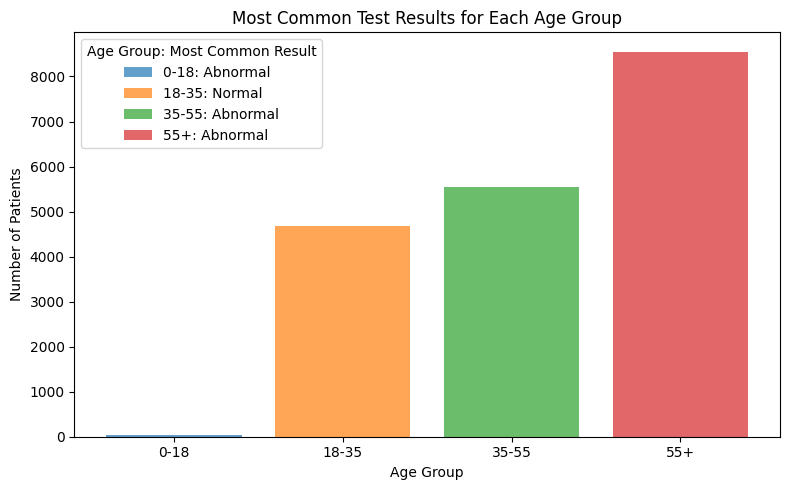

In [40]:
plt.figure(figsize=(8, 5))
for age_group, data in most_common1.groupby('Age Group', observed=False):
    plt.bar(data['Age Group'], data['Number of Patients'], label=f'{age_group}: {data["Test Results"].values[0]}', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Most Common Test Results for Each Age Group')
plt.legend(title='Age Group: Most Common Result')
plt.tight_layout()
plt.show()

# CONCLUSION

1. As we have analyzed that diabetes, arthritis, obesity are the common medical conditions among age groups 55+, 35-55 and 0-35. So such age groups should take preventive measures and also govt. should make people aware of the same.
2. From 'Most Common Test Results for Each Age Group' bar plot, we find that 18-35 age group has normal test result so they are not likely to be re-admitted, whereas 0-18 age group must be taken proper care of, and age groups 35-55 and 55+ have abnormal results so they are most likely to be re-admitted.